# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv
import datetime as dt     
date = dt.date.today()


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
print(api_key)

d689eeacf47b4feef8df2e71249cf223


In [8]:
timestamp=pd.to_datetime('today')
print(timestamp)

2019-10-11 22:45:29.083791


## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
numberofcities = len(cities)
numberofcities



602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
weatherresults = []
#dummy code to try it with only 3 cities=["London", "Paris", "New York"]
#create for loop with API weather response request
numberofcities = len(cities)
for i in range (0, numberofcities):
    city = cities[i]

    print(f'Processing Record {i} | {city}')
    # Prevent getting locked out by slowing the timing of the requests
    time.sleep(1.1)
    
    # Calling weather API for current weather data
    weather_response = requests.get(f"http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID={api_key}&q={city}")
    if weather_response.status_code == 200:
        json = weather_response.json()
        temp_max = json['main']['temp_max']
        humidity = json['main']['humidity']
        wind_speed = json['wind']['speed']
        cloudiness = json['clouds']['all']
        latitude = json['coord']['lat']
        longitude = json['coord']['lon']
        country = json['sys'].get('country', 'N/A')
        dt = json['dt']
        weatherresults.append({ 'city': city, 'cloudiness': cloudiness, 'country': country, 'date': dt, 'humidity': humidity, 'lat': latitude, 'lng': longitude, 'max_temp': temp_max, 'max_speed': wind_speed})
    
    else:
        print("city not found. Skipped ...")
        
print('-----------------------------')
print('Done')     
print('-----------------------------')


Processing Record 0 | rikitea
Processing Record 1 | goteborg
city not found. Skipped ...
Processing Record 2 | bad salzungen
Processing Record 3 | flin flon
Processing Record 4 | esperance
Processing Record 5 | hithadhoo
Processing Record 6 | samalaeulu
city not found. Skipped ...
Processing Record 7 | mataura
Processing Record 8 | ushuaia
Processing Record 9 | ribeira grande
Processing Record 10 | makokou
Processing Record 11 | pozhva
Processing Record 12 | hobart
Processing Record 13 | chokurdakh
Processing Record 14 | husavik
Processing Record 15 | trairi
Processing Record 16 | ryazan
Processing Record 17 | jamestown
Processing Record 18 | ancud
Processing Record 19 | bucerias
Processing Record 20 | khatanga
Processing Record 21 | east london
Processing Record 22 | great yarmouth
Processing Record 23 | atuona
Processing Record 24 | bengkulu
city not found. Skipped ...
Processing Record 25 | qaanaaq
Processing Record 26 | ponta do sol
Processing Record 27 | aykhal
Processing Record 2

Processing Record 226 | biak
Processing Record 227 | skalistyy
city not found. Skipped ...
Processing Record 228 | midland
Processing Record 229 | cravo norte
Processing Record 230 | tanakpur
Processing Record 231 | san patricio
Processing Record 232 | lowestoft
Processing Record 233 | forbes
Processing Record 234 | bang rakam
Processing Record 235 | cherskiy
Processing Record 236 | saint-georges
Processing Record 237 | sikeston
Processing Record 238 | kovdor
Processing Record 239 | balikpapan
Processing Record 240 | laguna
Processing Record 241 | khor
Processing Record 242 | kinshasa
Processing Record 243 | coquimbo
Processing Record 244 | pelym
Processing Record 245 | half moon bay
Processing Record 246 | canavieiras
Processing Record 247 | hambantota
Processing Record 248 | cyangugu
Processing Record 249 | taksimo
Processing Record 250 | egvekinot
Processing Record 251 | nchelenge
Processing Record 252 | benguela
Processing Record 253 | rafraf
Processing Record 254 | benjamin consta

Processing Record 454 | tarakan
Processing Record 455 | raga
city not found. Skipped ...
Processing Record 456 | tallahassee
Processing Record 457 | kamaishi
Processing Record 458 | poum
Processing Record 459 | mayskiy
Processing Record 460 | malanje
Processing Record 461 | dese
Processing Record 462 | maputo
Processing Record 463 | adrar
Processing Record 464 | matagami
Processing Record 465 | kem
Processing Record 466 | smolensk
Processing Record 467 | tahe
Processing Record 468 | karaul
city not found. Skipped ...
Processing Record 469 | ahipara
Processing Record 470 | filingue
Processing Record 471 | kharp
Processing Record 472 | tahta
city not found. Skipped ...
Processing Record 473 | savannah bight
Processing Record 474 | sao miguel do araguaia
Processing Record 475 | juneau
Processing Record 476 | comarapa
Processing Record 477 | zavet
Processing Record 478 | baruun-urt
Processing Record 479 | jijiang
Processing Record 480 | port hardy
Processing Record 481 | coahuayana
Process

In [11]:
weatherresults

[{'city': 'rikitea',
  'cloudiness': 100,
  'country': 'PF',
  'date': 1570851932,
  'humidity': 60,
  'lat': -23.12,
  'lng': -134.97,
  'max_temp': 69.94,
  'max_speed': 8},
 {'city': 'bad salzungen',
  'cloudiness': 46,
  'country': 'DE',
  'date': 1570851935,
  'humidity': 76,
  'lat': 50.81,
  'lng': 10.23,
  'max_temp': 55.99,
  'max_speed': 12.75},
 {'city': 'flin flon',
  'cloudiness': 0,
  'country': 'CA',
  'date': 1570851936,
  'humidity': 62,
  'lat': 54.77,
  'lng': -101.88,
  'max_temp': 30.16,
  'max_speed': 11.35},
 {'city': 'esperance',
  'cloudiness': 75,
  'country': 'AU',
  'date': 1570851937,
  'humidity': 87,
  'lat': -33.86,
  'lng': 121.89,
  'max_temp': 59,
  'max_speed': 9.17},
 {'city': 'hithadhoo',
  'cloudiness': 100,
  'country': 'MV',
  'date': 1570851939,
  'humidity': 78,
  'lat': -0.6,
  'lng': 73.08,
  'max_temp': 81.82,
  'max_speed': 18.61},
 {'city': 'mataura',
  'cloudiness': 100,
  'country': 'NZ',
  'date': 1570851941,
  'humidity': 79,
  'lat':

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
#Create Dataframe
weather_df= pd.DataFrame(weatherresults)
weather_df.head()


,city,cloudiness,country,date,humidity,lat,lng,max_temp,max_speed
0,rikitea,100,PF,1570851932,60,-23.12,-134.97,69.94,8.00
1,bad salzungen,46,DE,1570851935,76,50.81,10.23,55.99,12.75
2,flin flon,0,CA,1570851936,62,54.77,-101.88,30.16,11.35
3,esperance,75,AU,1570851937,87,-33.86,121.89,59.00,9.17
4,hithadhoo,100,MV,1570851939,78,-0.60,73.08,81.82,18.61


In [13]:
#write to CSV
weather_df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

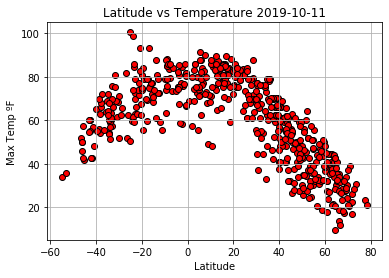

In [14]:
plt.scatter(weather_df["lat"],weather_df["max_temp"], marker="o", c="red", edgecolor ="black")
plt.title(f"Latitude vs Temperature {date}")
plt.ylabel("Max Temp ºF")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("LatVTemp.png")

#### Latitude vs. Humidity Plot

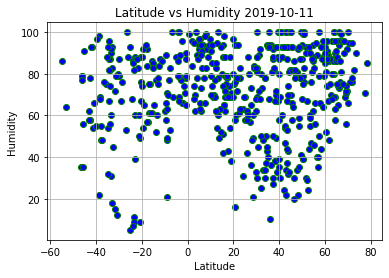

In [15]:
plt.scatter(weather_df["lat"],weather_df["humidity"], marker="o", c="blue", edgecolor ="green")
plt.title(f"Latitude vs Humidity {date}")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("LatHumPlot.png")

#### Latitude vs. Cloudiness Plot

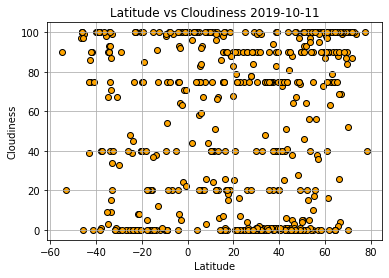

In [16]:
plt.scatter(weather_df["lat"],weather_df["cloudiness"],marker="o", c="orange", edgecolor ="black")
plt.title(f"Latitude vs Cloudiness {date}")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("LatCloudPlot.png")

#### Latitude vs. Wind Speed Plot

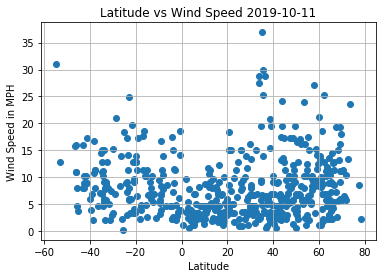

In [17]:
plt.scatter(weather_df["lat"],weather_df["max_speed"])
plt.title(f"Latitude vs Wind Speed {date}")
plt.ylabel("Wind Speed in MPH")
plt.xlabel("Latitude")
plt.grid()